In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random

In [2]:
df = pd.read_csv('insurance1.csv')

# Data Definition
- age : Age of the policyholder (Numeric)
- sex: Gender of policyholder (Categoric)
- weight: Weight of the policyholder (Numeric)
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)
- no_of_dependents: Number of dependent persons on the policyholder (Numeric)
- smoker: Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)
- claim: The amount claimed by the policyholder (Numeric)

- bloodpressure: Bloodpressure reading of policyholder (Numeric)
- diabetes: Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)
- regular_ex: A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)
- job_title: Job profile of the policyholder (Categoric)
- city: The city in which the policyholder resides (Categoric)
- hereditary_diseases: A policyholder suffering from a hereditary diseases or not (Categoric)




In [3]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [4]:
df.shape

(15000, 13)

In [5]:
tot = df.shape[0]

In [6]:
round((df.isnull().sum()/tot)*100,0)

age                    3.0
sex                    0.0
weight                 0.0
bmi                    6.0
hereditary_diseases    0.0
no_of_dependents       0.0
smoker                 0.0
city                   0.0
bloodpressure          0.0
diabetes               0.0
regular_ex             0.0
job_title              0.0
claim                  0.0
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [8]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [9]:
df.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim'],
      dtype='object')

In [10]:
cat_col=[]
for col in df.columns:
    if df[col].dtypes=='O':
        cat_col.append(col)
     

In [11]:
cat_col.append('smoker')

In [12]:
cat_col

['sex', 'hereditary_diseases', 'city', 'job_title', 'smoker']

In [13]:
df.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim'],
      dtype='object')

In [14]:
cat_col.append('regular_ex')

In [21]:
cat_col=['sex', 'smoker', 'regular_ex']

In [27]:
#sns.set_style("dark")
sns.set_style("darkgrid", {"grid.color": ".9", "grid.linestyle": "-"})

# Univariate Analysis
- Categorical Data

In [24]:
for col in cat_col:
    print(df[col].value_counts(),"\n\n")


sex
female    7652
male      7348
Name: count, dtype: int64 


smoker
0    12028
1     2972
Name: count, dtype: int64 


regular_ex
0    11638
1     3362
Name: count, dtype: int64 




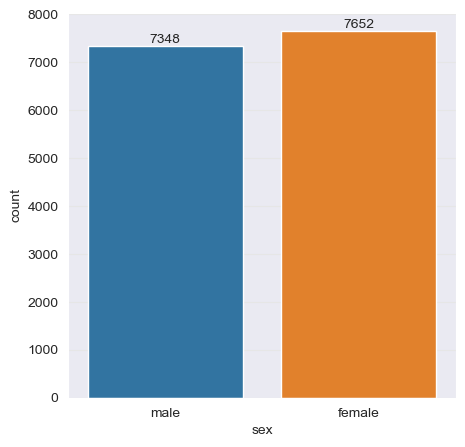

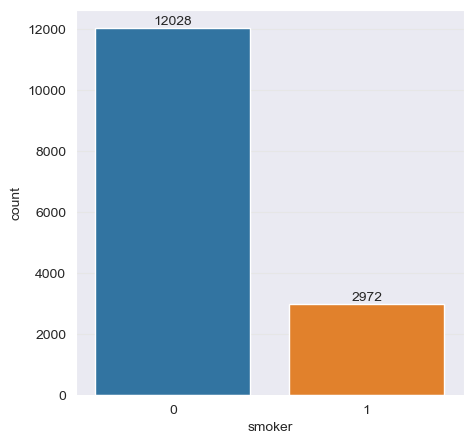

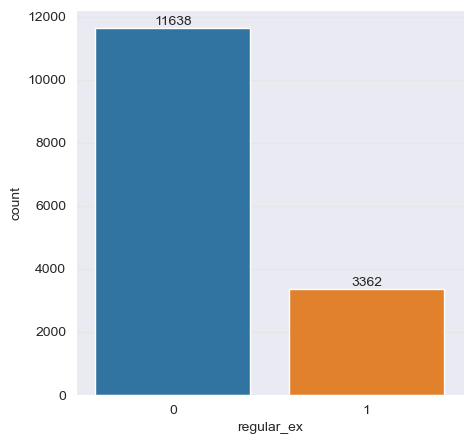

In [28]:
for col in cat_col:
    plt.figure(figsize=(5,5))
    ax=sns.countplot(x=col,data=df)
    for x in ax.containers:
        ax.bar_label(x)
        
    plt.show()

In [ ]:
for col in cat_col:
    plt.figure(figsize=(5,5))
    ax=sns.countplot(x=col,data=df)
    for x in ax.containers:
        ax.bar_label(x)
        
    plt.show()

<Axes: ylabel='count'>

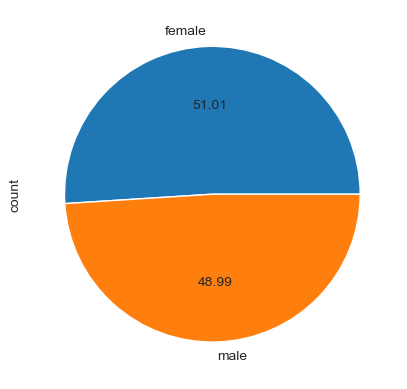

In [32]:
df['sex'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

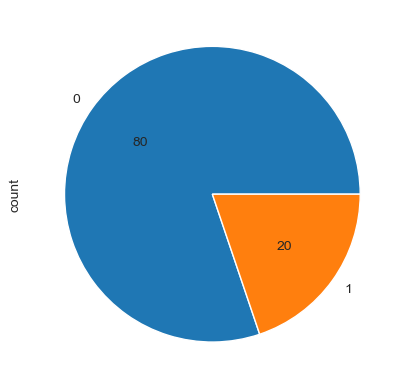

In [37]:
df['smoker'].value_counts().plot(kind='pie', autopct="%.0f")

([<matplotlib.patches.Wedge at 0x28683dfdb50>,
 [Text(-0.03501234635897312, 1.0994426477094836, ''),
  Text(0.035012346358973226, -1.0994426477094836, '')],
 [Text(-0.01909764346853079, 0.5996959896597183, '51'),
  Text(0.01909764346853085, -0.5996959896597183, '49')])

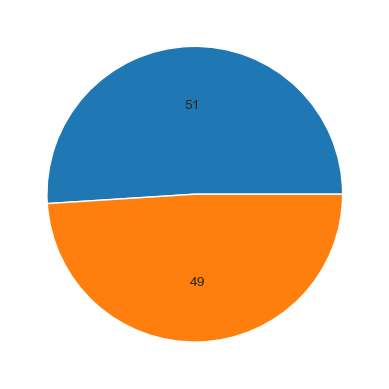

In [34]:
plt.pie(x=df['sex'].value_counts(),autopct="%.0f")
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [39]:
numerical=['age','bmi','no_of_dependents']

In [40]:
df[numerical]

,age,bmi,no_of_dependents
0,60.0,24.3,1
1,49.0,22.6,1
2,32.0,17.8,2
3,61.0,36.4,1
4,19.0,20.6,0
...,...,...,...
14995,39.0,28.3,1
14996,39.0,29.6,4
14997,20.0,33.3,0
14998,52.0,36.7,0


Skewness of age: 0.005576775986078496
Skewness of bmi: 0.3752585894901583
Skewness of no_of_dependents: 0.9289345167145934


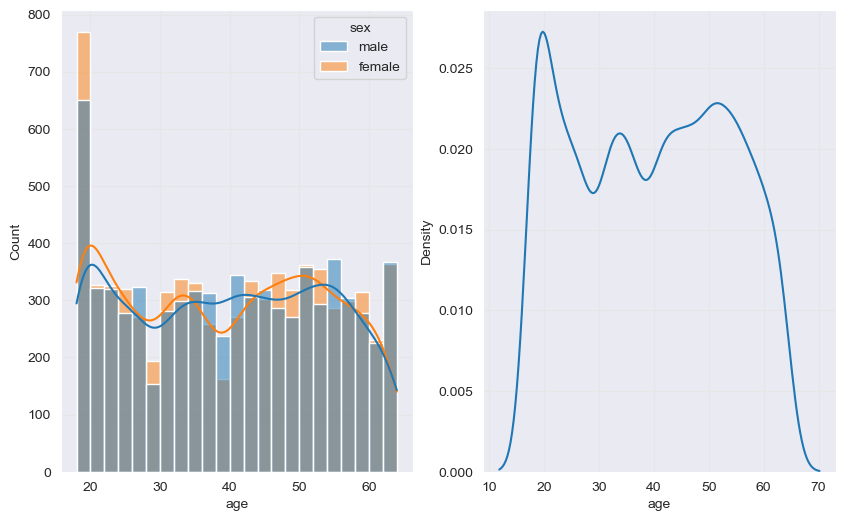

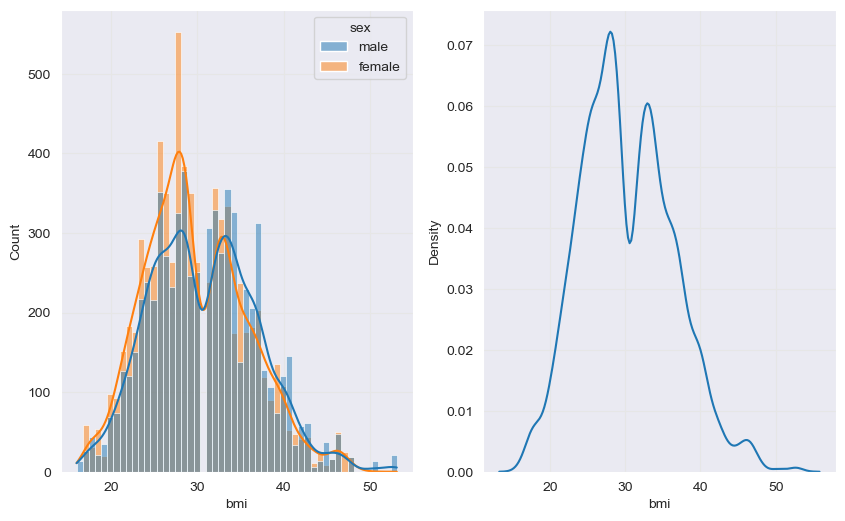

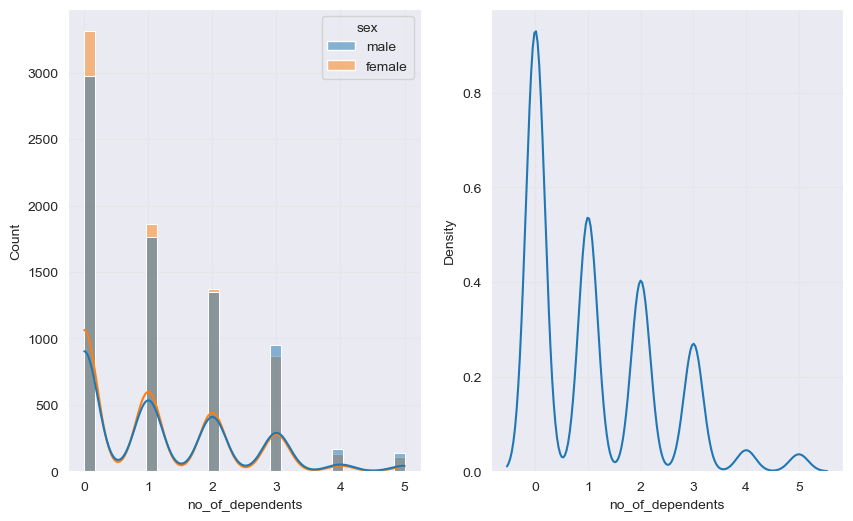

In [53]:
for col in numerical:
    fig,axs=plt.subplots(1,2, figsize=(10,6))
    sns.histplot(data=df,x=col,hue='sex', kde=True, ax=axs[0])
    sns.kdeplot(df[col], ax=axs[1])
    print(f"Skewness of {col}: {df[col].skew()}")

In [ ]:
Observation: 
    

# Box plot for outlier detection

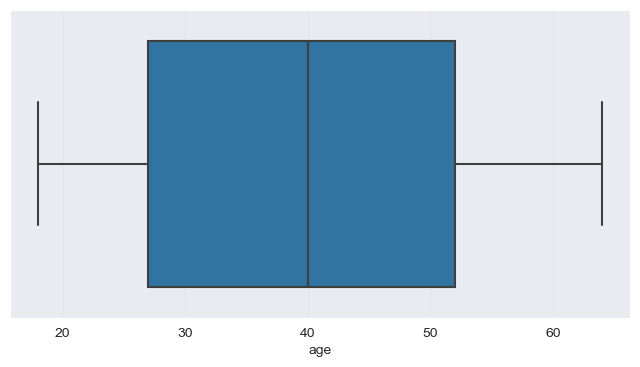

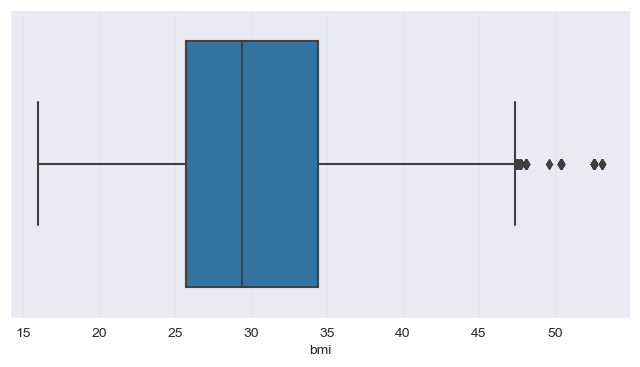

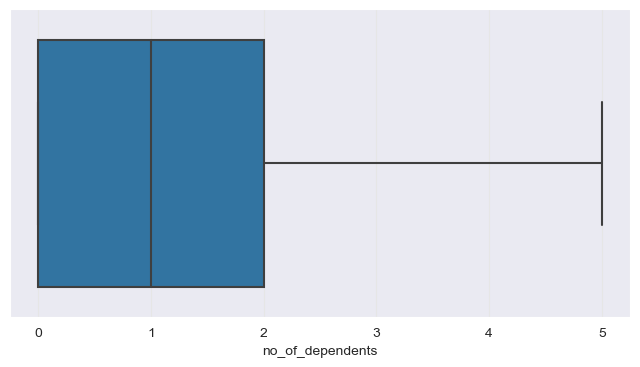

In [47]:
for col in numerical:
    plt.figure(figsize=(8,4))
    sns.boxplot(df,x=col)

In [ ]:
Bivariate/Multivariate Analysis